#Week 4 Assignment


---


By imjjun(KUBIG 16th)

We would implement the 'Convolution' layer and its backpropagation as we had learned it in Session. You don't need to consider the efficiency. Only focus on the implementation of Algorithm with anyway.

- Naive Convolution layer_forward

- Naive convolution layer_backward

- Max Pool_forward

- Max Pool_backward

\* As you know, assignments are mainly referenced from cs231n assignments (by purpose of education, not business)

**Use only numpy, not using torch, tensorflow, etc**

In [1]:
#Numpy with error operation

import numpy as np

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def eval_numerical_gradient_array(f, x, df, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"]) #nditer defines the 'iteration' of our methods. You don't need to know it deeply.
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h) #operation of numerical gradient which is '[f(x+h)-f(x)/h]'
        it.iternext() #method of nditer & it makes the next iteration of our 'while' loop
    return grad

##1. Naive Convolution layer_forward


Considering the given input & output, implement your own convolution layer!

Conv_param consists of two variables, *conv_param['stride']= # of stride*, *conv_param['pad']= # of padding*. Padding must be placed symmetrically, not like methods of pytorch & tensorflow.

You can test your implementation by using the below debugging code.

\*Hint: You might use 4 loops to implement it & pre-defined output with np.zeros

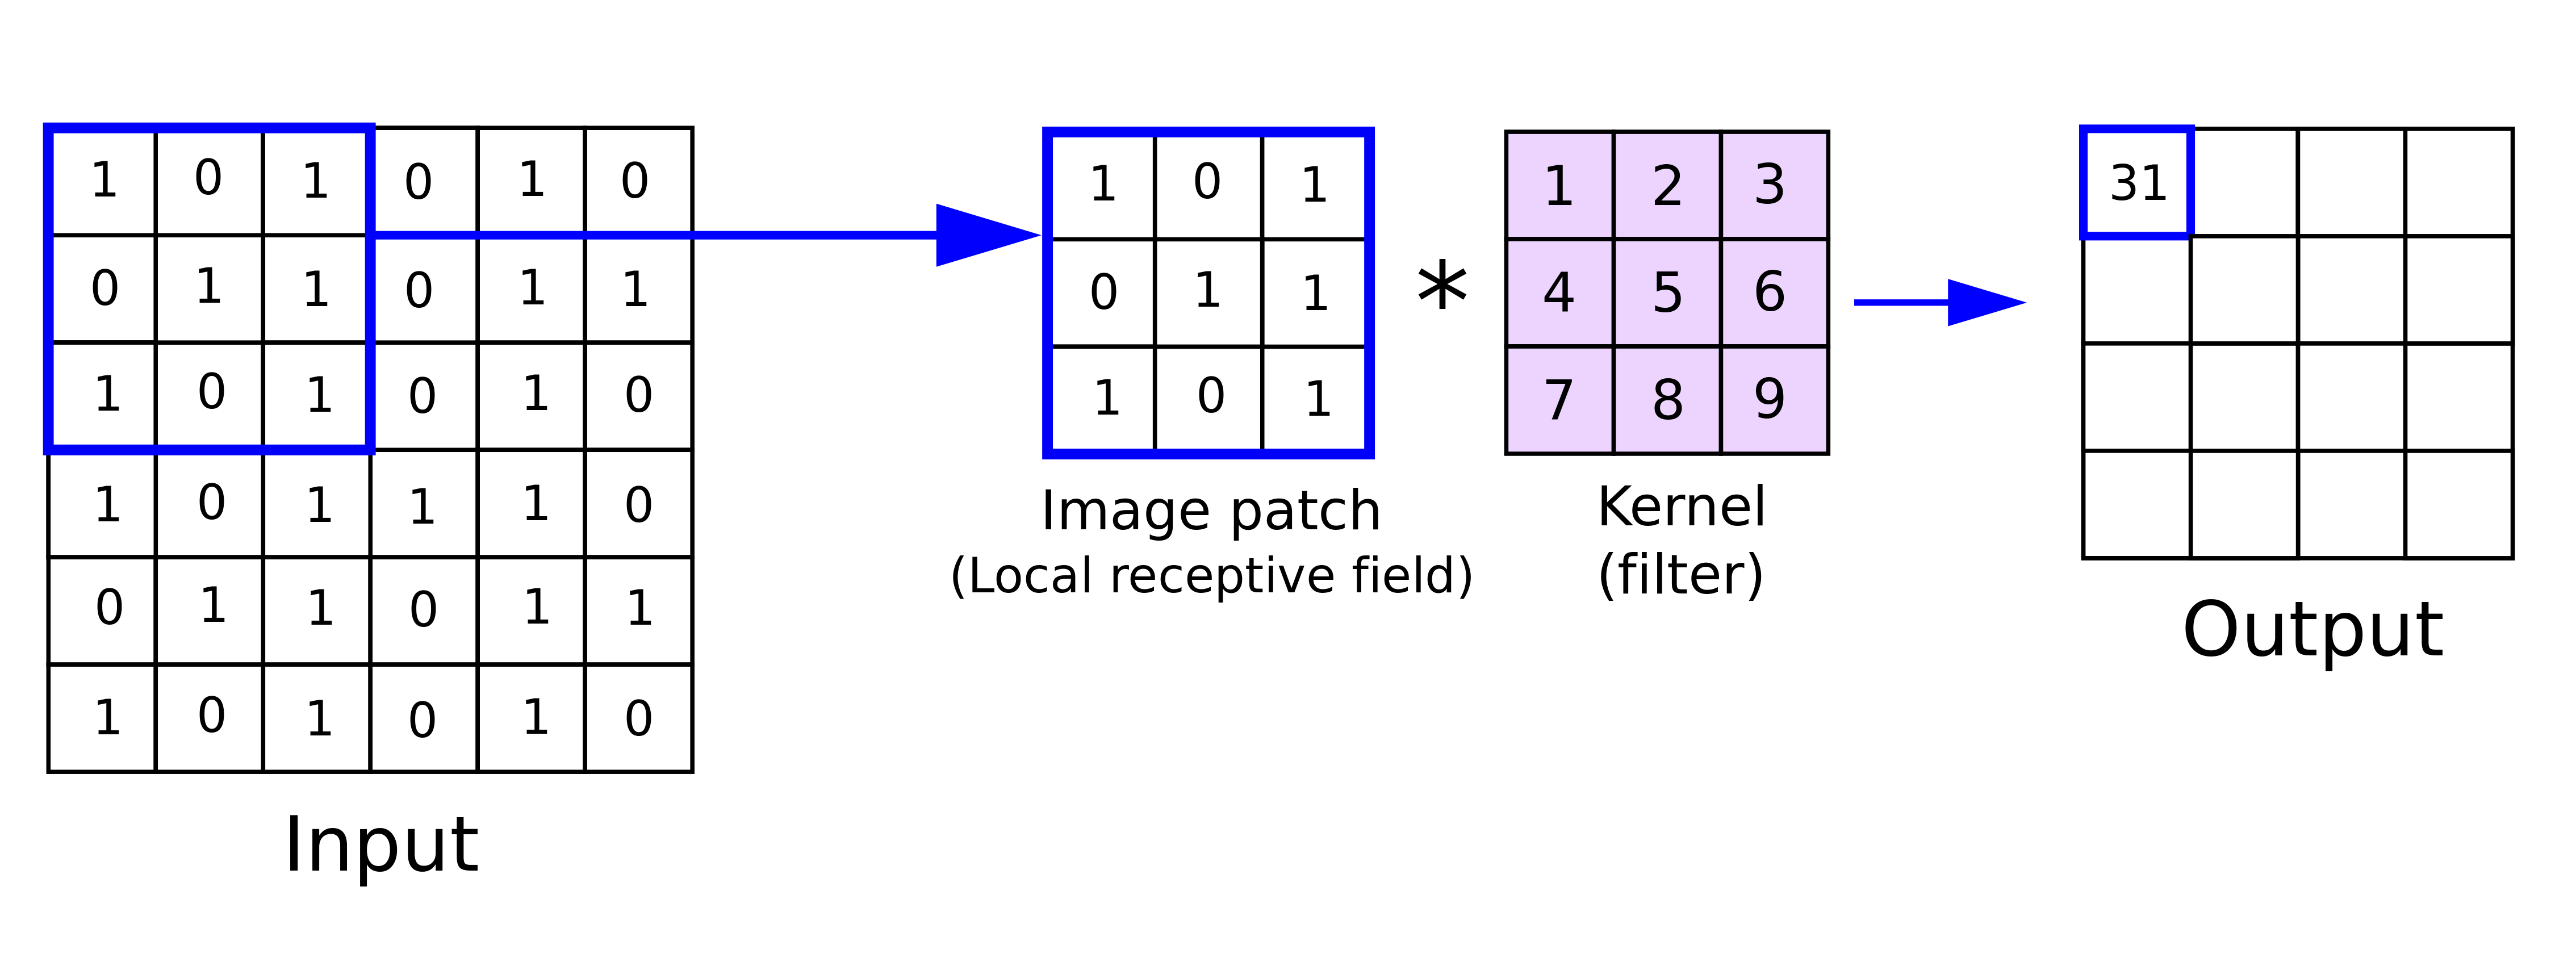

In [2]:
def conv_forward_naive(x, w, b, conv_param):
    """
    A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and
    width W. We convolve each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.


    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    N,C,H,W=x.shape
    F,C,HH,WW=w.shape
    S=conv_param['stride']
    P=conv_param['pad']

    x_pad=np.pad(x,((0,),(0,),(P,),(P,)),'constant')
    H1 = 1 + (H + 2 * P - HH) / S
    W1 = 1 + (W + 2 * P - WW) / S
    H1=int(H1)
    W1=int(W1)

    out = np.zeros((N, F, H1, W1))

    for n in range(N):
      for f in range(F):
        for k in range(H1):
          for l in range(W1):
            out[n, f, k, l] = np.sum(x_pad[n, :, k * S:k * S + HH, l * S:l * S + WW] * w[f, :]) + b[f]

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache


Test code

In [3]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward_naive(x, w, b, conv_param)
correct_out = np.array([[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]])

# Compare your output to ours; difference should be around e-8
print('Testing conv_forward_naive')
print('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


###MINI Visualization

You could visualize your own implementation, using below codes!

In this code, some filters are arbitrarily defined so that they can find something what we intend but actually those filters' tensors are determined by our 'Training'.

Therefore, just see the filter's simple role but MUST NOT think that it is deterministic like the given filters.

In [6]:
#Download some cute images!

!gdown 147BCMH4cvz8RB3lp80150YABg2S7zBZ2
!gdown 1vAZbx4JQsIEn_6cEIL6gPcMnB3vSAX-6

'gdown'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'gdown'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
from imageio.v2 import imread
from PIL import Image #PIL library is useful for handling the images or videos like OpenCV.
import matplotlib.pyplot as plt

kitten = imread('/content/kitten.jpg')
puppy = imread('/content/puppy.jpg')

d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :] # Cropping the center of image of kitten

img_size = 200   # Make this smaller if it runs too slow
resized_puppy = np.array(Image.fromarray(puppy).resize((img_size, img_size)))
resized_kitten = np.array(Image.fromarray(kitten_cropped).resize((img_size, img_size)))
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = resized_puppy.transpose((2, 0, 1))
x[1, :, :, :] = resized_kitten.transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]] # red filter
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]] # green filter
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]] # blue filter

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_no_ax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_no_ax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_no_ax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_no_ax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_no_ax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_no_ax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_no_ax(out[1, 1])
plt.show()

ModuleNotFoundError: No module named 'imageio'

##2. Naive Convolution layer _ backward

Using conv_forward_naive, we could also implement the backward operation of Convolution layer.

Since there is similar operation with affine_backward, you can consider the 'restoration' of gradient on input layers. Also, like forward operation, you might use 4 loops!

Also, you could test your implementation by using below codes either!

\*Hint: You might worry about the padded things but you can just "crop" the original size of input.

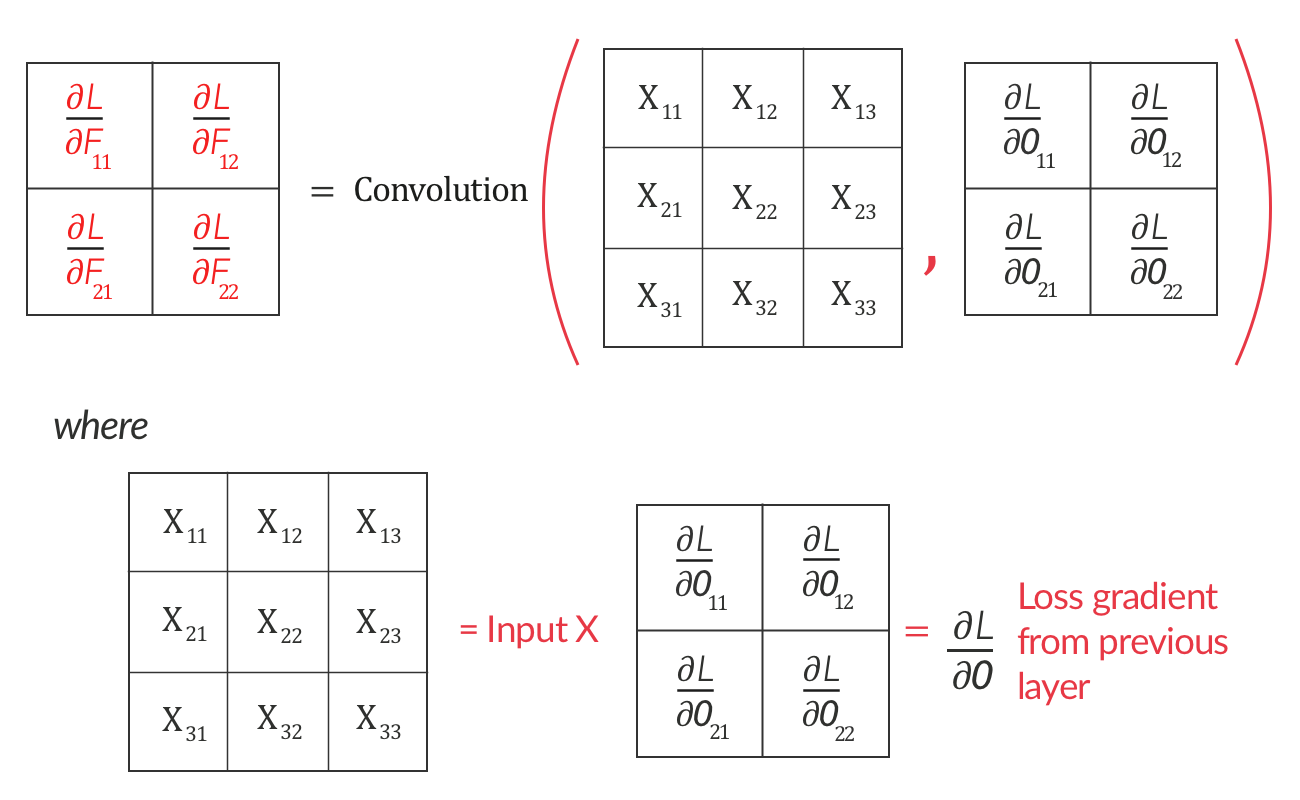

In [7]:
def conv_backward_naive(dout, cache):
    """
    A naive implementation of the backward pass for a convolutional layer.

    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x, w, b, conv_param = cache
    P = conv_param['pad']
    x_pad = np.pad(x, ((0,), (0,), (P,), (P,)), 'constant')

    N, C, H, W = x.shape
    F, C, HH, WW = w.shape
    N, F, H1, W1 = dout.shape
    S = conv_param['stride']

    dw = np.zeros((F, C, HH, WW))
    for fprime in range(F):
        for cprime in range(C):
            for i in range(HH):
                for j in range(WW):
                    sub_xpad = x_pad[:, cprime, i:i + H1 * S:S, j:j + W1 * S:S]
                    dw[fprime, cprime, i, j] = np.sum(dout[:, fprime, :, :] * sub_xpad)

    db = np.zeros((F))
    for fprime in range(F):
        db[fprime] = np.sum(dout[:, fprime, :, :])

    dx = np.zeros((N, C, H, W))
    for nprime in range(N):
        for i in range(H):
            for j in range(W):
                for f in range(F):
                    for k in range(H1):
                        for l in range(W1):
                            mask1 = np.zeros_like(w[f, :, :, :])
                            mask2 = np.zeros_like(w[f, :, :, :])
                            if (i + P - k * S) < HH and (i + P - k * S) >= 0:
                                mask1[:, i + P - k * S, :] = 1.0
                            if (j + P - l * S) < WW and (j + P - l * S) >= 0:
                                mask2[:, :, j + P - l * S] = 1.0
                            w_masked = np.sum(w[f, :, :, :] * mask1 * mask2, axis=(1, 2))
                            dx[nprime, :, i, j] += dout[nprime, f, k, l] * w_masked

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


Test code

In [8]:
np.random.seed(231)
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_naive(x, w, b, conv_param)[0], b, dout)

out, cache = conv_forward_naive(x, w, b, conv_param)
dx, dw, db = conv_backward_naive(dout, cache)

# Your errors should be around e-8 or less.
print('Testing conv_backward_naive function')
print('dx error: ', rel_error(dx, dx_num))
print('dw error: ', rel_error(dw, dw_num))
print('db error: ', rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  1.159803161159293e-08
dw error:  2.2471230668641297e-10
db error:  3.3726153958780465e-11


##3. Max Pool_forward

As we have learned, Max Pooling is an another important operation of convolution layer so that our network could focus on where the important parts are.

This operation is similar to ReLU but Max Pool uses some filters like Convolution layer. You have to consider these characteristics and enjoy your implementation :) You could try the test of implementation, using below code either!

\*Hint: You might use 4 loops like convolution & use np.max or np.maximum like ReLU

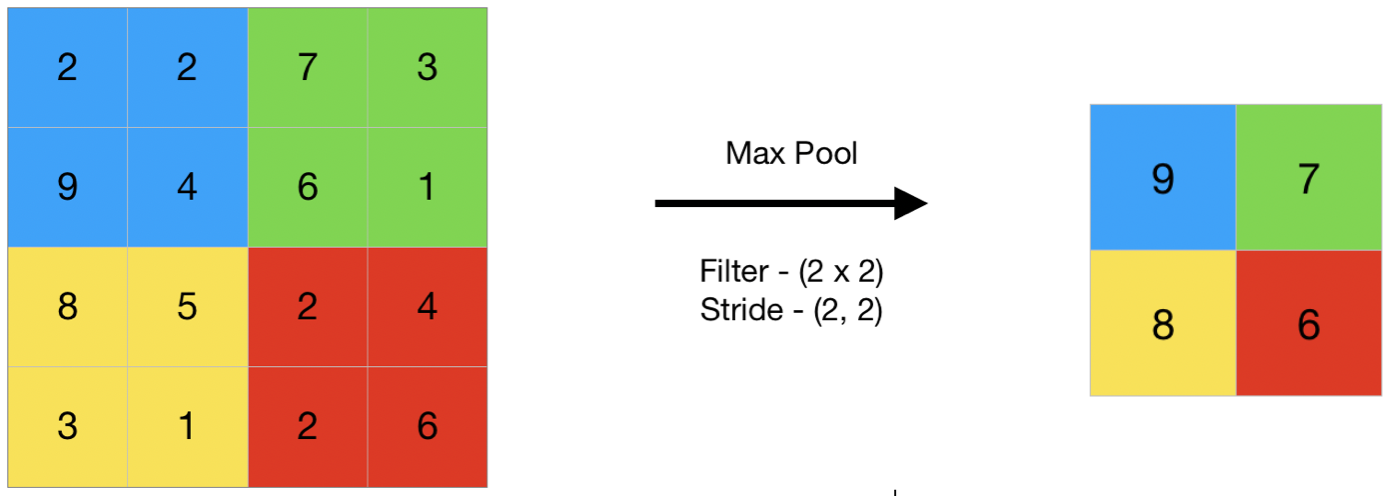

In [29]:
def max_pool_forward_naive(x, pool_param):
    """
    A naive implementation of the forward pass for a max-pooling layer.

    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions

    No padding is necessary here, eg you can assume:
      - (H - pool_height) % stride == 0
      - (W - pool_width) % stride == 0

    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    Hp = pool_param['pool_height']
    Wp = pool_param['pool_width']
    S = pool_param['stride']
    N, C, H, W = x.shape
    H1 = (H - Hp) / S + 1
    W1 = (W - Wp) / S + 1
    H1=int(H1)
    W1=int(W1)

    out = np.zeros((N, C, H1, W1))
    for n in range(N):
        for c in range(C):
            for k in range(H1):
                for l in range(W1):
                    out[n, c, k, l] = np.max(x[n, c, k * S:k * S + Hp, l * S:l * S + Wp])



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache

Test code

In [30]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num=np.prod(x_shape)).reshape(x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = max_pool_forward_naive(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

# Compare your output with ours. Difference should be on the order of e-8.
print('Testing max_pool_forward_naive function:')
print('difference: ', rel_error(out, correct_out))

Testing max_pool_forward_naive function:
difference:  4.1666665157267834e-08


##4. Max Pool_backward

This implementation is really similar to above. We have already learned the role of Max function in terms of 'Gradient'. You can also test your implementation by using below code.



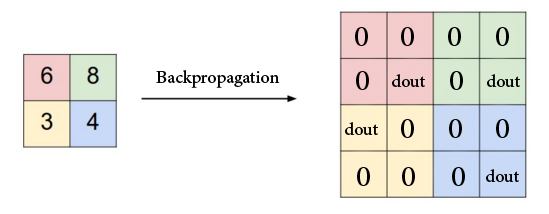

In [31]:
def max_pool_backward_naive(dout, cache):
    """
    A naive implementation of the backward pass for a max-pooling layer.

    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.

    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    # Hint: use np.unravel_index & np.argmax function in the loop.            #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x, pool_param = cache
    Hp = pool_param['pool_height']
    Wp = pool_param['pool_width']
    S = pool_param['stride']
    N, C, H, W = x.shape
    H1 = (H - Hp) / S + 1
    W1 = (W - Wp) / S + 1
    H1=int(H1)
    W1=int(W1)

    dx = np.zeros((N, C, H, W))
    for nprime in range(N):
        for cprime in range(C):
            for k in range(H1):
                for l in range(W1):
                    x_pooling = x[nprime, cprime, k *
                                  S:k * S + Hp, l * S:l * S + Wp]
                    maxi = np.max(x_pooling)
                    x_mask = x_pooling == maxi
                    dx[nprime, cprime, k * S:k * S + Hp, l * S:l *S + Wp] += dout[nprime, cprime, k, l] * x_mask


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx

Test code

In [32]:
np.random.seed(231)
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward_naive(x, pool_param)[0], x, dout)

out, cache = max_pool_forward_naive(x, pool_param)
dx = max_pool_backward_naive(dout, cache)

# Your error should be on the order of e-12
print('Testing max_pool_backward_naive function:')
print('dx error: ', rel_error(dx, dx_num))

Testing max_pool_backward_naive function:
dx error:  3.27562514223145e-12


**End of this notebook**